<a href="https://colab.research.google.com/github/Mr-big-cake/CUDA_Labs/blob/main/%D0%9F%D0%93%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ПГП
##MPI+pyTorch

- Студент: Подсвиров Антон
- Группа: М8О-107М-22
- Модель: AlexNet
- Датасет: CIFAR10 
- Задача: классификация по 10 классам

###Этап А.  
* MasterNode рассылает ComputeNodes нейронки и части датасета для обучения  
* ComputeNodes обучают свои модели и информируют MasterNode об этом  

###Этап Б. Inference  
* К MasterNode передается объект данных для предсказаения.  
* MasterNode рассылает его всем ComputeNodes.  
* ComputeNodes делают предсказания и отправляют их MasterNode.  
* MasterNode на основе всех предсказаний делает голосование и выбирает предсказание.  

###Ансамбльный метод:  
* Усреднение (если задача регрессии)  
* Самый частовыбираемый класс (если задача классификации) или наиболее уверененный  
=


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_data.data = train_data.data[0:100]
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_data.data = train_data.data[0:100]
testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)

classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


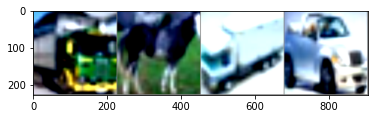

Truck Horse Truck   Car


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
#Now using the AlexNet
AlexNet_Model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
AlexNet_Model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.nn as nn
AlexNet_Model.classifier[1] = nn.Linear(9216,4096)
AlexNet_Model.classifier[4] = nn.Linear(4096,1024)
AlexNet_Model.classifier[6] = nn.Linear(1024,10)

In [ ]:
AlexNet_Model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(AlexNet_Model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
import time

In [ ]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    start_time = time.time()
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0], data[1]

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = AlexNet_Model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        #Time
        end_time = time.time()
        time_taken = end_time - start_time

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            print('Time:',time_taken)
            running_loss = 0.0

print('Finished Training of AlexNet')

Finished Training of AlexNet


In [ ]:
#Testing Accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        outputs = AlexNet_Model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 8.00 %


In [ ]:
with torch.no_grad():
  for d in testloader:
    images, labels = d
    outputs = AlexNet_Model(images)
    _, predicted = torch.max(outputs.data, 1)
    res = ((predicted == labels).sum().item(), labels)
    break;

In [ ]:
res[1].tolist()

[3, 8, 8, 0]

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1]
        outputs = AlexNet_Model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Airplane :  0 %
Accuracy of   Car :  0 %
Accuracy of  Bird :  0 %
Accuracy of   Cat :  0 %
Accuracy of  Deer :  0 %
Accuracy of   Dog :  0 %
Accuracy of  Frog :  0 %
Accuracy of Horse :  0 %
Accuracy of  Ship :  0 %
Accuracy of Truck :  0 %


##MPI часть

In [ ]:
!pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438505 sha256=0dc6877a2f6e9585ccd55787b4abda5ca0c50f0f0a13b93b1bc7f6dd37d7bb6c
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [ ]:
!mpirun -np 4 --allow-run-as-root python MPI+pyTorch.py

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.

In [ ]:
from mpi4py import MPI
import time
import math
from scipy import random
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size


classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

if rank == 0:
  data = [[x*10, x*10 + 10] for x in range(size)]
else:
  data = None

p = comm.scatter(data, root=0)

transform = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),])

if rank != 0:


  train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
  train_data.data = train_data.data[p[0]: p[1]] 
  trainloader = torch.utils.data.DataLoader(train_data, batch_size=4, shuffle=True, num_workers=2)

  AlexNet_Model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)
  AlexNet_Model.eval()
  AlexNet_Model.classifier[1] = nn.Linear(9216,4096)
  AlexNet_Model.classifier[4] = nn.Linear(4096,1024)
  AlexNet_Model.classifier[6] = nn.Linear(1024,10)
  AlexNet_Model.eval()
  
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(AlexNet_Model.parameters(), lr=0.001, momentum=0.9)
  
  for i, d in enumerate(trainloader, 0):
    inputs, labels = d[0], d[1]
    optimizer.zero_grad()
    output = AlexNet_Model(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
  
  data = "Обучение в ноде №" + str(rank) + " закончено" 
else:
  data = None

answer = comm.gather(data,root=0)

MPI.Comm.Barrier(MPI.COMM_WORLD)

if rank == 0: 
  print ("\n Этап А завершен: \n", answer)
  data = 255
else:
  data = None

p = comm.bcast(data, root = 0)

if rank != 0:
  test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
  test_data.data = test_data.data[p:]
  testloader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=False, num_workers=2)
  with torch.no_grad():
    for d in testloader:
      images, labels = d
      outputs = AlexNet_Model(images)
      _, predicted = torch.max(outputs.data, 1)
      result = ((predicted == labels).sum().item(), labels)
      result = ((result[1]).tolist())[0]
      data = result
      break;
else:
  result = None

answer = comm.gather(data,root=0)

MPI.Comm.Barrier(MPI.COMM_WORLD)
if rank == 0: 
  print ("\n Этап Б завершен: \n", answer[1:])
  my_dict = dict()
  for i in answer[1:]:
    if i in my_dict:
      my_dict[i] += 1
    else:
      my_dict[i] = 1
  max_val = max(my_dict.values())
  final_dict = {k:v for k, v in my_dict.items() if v == max_val}
  final = list(final_dict.keys())
  print("Результат ансамбльного голосования: ", classes[final[0]])


MPI.Comm.Barrier(MPI.COMM_WORLD)
MPI.Finalize